<h2> Task 13. The Needleman-Wunch Algorithm </h2>
The goal of this task is to implement basic Needleman-Wunsch algorithm for sequence alignment and to experiment with various scoring parameters to understand their impact on alignment quality.

1.   Initialization: Create a scoring matrix initialized with zeros. The dimensions of the matrix should be based on the lengths of the two sequences being aligned.
2.   Scoring System: Define a scoring system that includes: Match Score: The score for matching characters, Mismatch Penalty: The penalty for aligning different characters, Gap Penalty: The penalty for introducing gaps in the alignment.
3.   Implement filling the Matrix: Fill in the scoring matrix according to the Needleman-Wunsch algorithm rules.
4.   Implement Traceback: After filling the matrix, perform a traceback to construct the aligned sequences.
<p>
Here are two sequences which you can use for example run:
*   S1 = "ACTGACTGAACCCAA"
*   S2 = "ACTGATCAA"
</p>
In order to check your implementation correctness use the following page: https://bioboot.github.io/bimm143_W20/class-material/nw/


In [ ]:
import numpy as np

def _sub_score(a, b, match, mismatch):
    return match if a == b else mismatch

def fill_in_the_matrix(s1, s2, match=1, mismatch=-1, gap=-2):
    n, m = len(s1), len(s2)
    score = np.zeros((n+1, m+1), dtype=int)
    pointer = np.zeros((n+1, m+1), dtype=int)  # 0=diag, 1=up, 2=left

    for i in range(1, n+1):
        score[i, 0] = score[i-1, 0] + gap
        pointer[i, 0] = 1  # came from up
    for j in range(1, m+1):
        score[0, j] = score[0, j-1] + gap
        pointer[0, j] = 2  # came from left

    # Fill the DP
    for i in range(1, n+1):
        for j in range(1, m+1):
            diag = score[i-1, j-1] + _sub_score(s1[i-1], s2[j-1], match, mismatch)
            up   = score[i-1, j] + gap
            left = score[i, j-1] + gap
            best = max(diag, up, left)

            score[i, j] = best
            # Deterministic tie-breaking: prefer diag > up > left
            if best == diag:
                pointer[i, j] = 0
            elif best == up:
                pointer[i, j] = 1 
            else:
                pointer[i, j] = 2

    return score, pointer

def traceback(s1, s2, score, pointer):

    i, j = len(s1), len(s2)
    aln1, aln2 = [], []

    while i > 0 or j > 0:
        if i > 0 and j > 0 and pointer[i, j] == 0:
            aln1.append(s1[i-1]); aln2.append(s2[j-1])
            i -= 1; j -= 1
        elif i > 0 and (j == 0 or pointer[i, j] == 1):
            aln1.append(s1[i-1]); aln2.append('-')
            i -= 1
        else:  # j > 0 and (i == 0 or pointer[i, j] == 2)
            aln1.append('-'); aln2.append(s2[j-1])
            j -= 1

    return ''.join(reversed(aln1)), ''.join(reversed(aln2)), int(score[len(s1), len(s2)])


def needleman_wunsch(s1, s2, match=1, mismatch=-1, gap=-2):
    score, ptr = fill_in_the_matrix(s1, s2, match, mismatch, gap)
    a1, a2, s = traceback(s1, s2, score, ptr)
    return a1, a2, s, score


S1 = "ACTGACTGAACCCAA"
S2 = "ACTGATCAA"

aligned1, aligned2, final_score, score_matrix = needleman_wunsch(
    S1, S2, match=1, mismatch=-1, gap=-2
)

print("Aligned S1:", aligned1)
print("Aligned S2:", aligned2)
print("Final alignment score:", final_score)



Aligned S1: ACTGACTGAACCCAA
Aligned S2: ACTGA-T-----CAA
Final alignment score: -3


<h2> Task 14. Time complexity of The Needleman-Wunch Algorithm </h2>


1.   What is the time complexity of The Needleman-Wunch Algorith? Both filling in and traceback
2.   Why?
3.   When we say time complexity, we mean O() annotation. This means worst possible case. Using the implementation from Task 12. demonstrate the worst time complexity or worst possible case.


##### 1. Time Complexity
**Matrix Filling:** O(m × n)  
**Traceback:** O(m + n)  
**Overall:** O(m × n)

##### 2. Why?
- Must fill (m+1) × (n+1) matrix - each cell takes constant time
- Traceback path length ≤ m + n steps
- Matrix filling dominates overall complexity


seq_len1 | seq_len2 | total_time (s) | time_per_cell (s) | m×n
-----------------------------------------------------------------
      50 |       50 |       0.0016 |    0.00000063 | 2500
     100 |      100 |       0.0058 |    0.00000058 | 10000
     150 |      150 |       0.0129 |    0.00000057 | 22500
     200 |      200 |       0.0226 |    0.00000057 | 40000
     300 |      300 |       0.0522 |    0.00000058 | 90000
     400 |      400 |       0.0970 |    0.00000061 | 160000


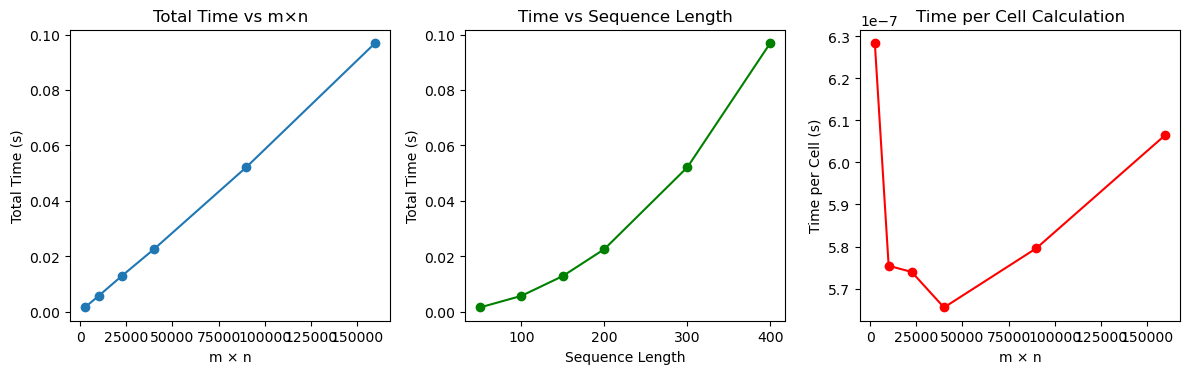

Worst case demonstration (200×200 different sequences): 0.0244s


In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt

def measure_nw_complexity(len1, len2, match=1, mismatch=-1, gap=-2):
    seq1 = ''.join(np.random.choice(list('ATGC'), len1))
    seq2 = ''.join(np.random.choice(list('ATGC'), len2))
    t0 = time.time()
    score, ptr = fill_in_the_matrix(seq1, seq2, match=match, mismatch=mismatch, gap=gap)
    _ = traceback(seq1, seq2, score, ptr) 
    return time.time() - t0

print("seq_len1 | seq_len2 | total_time (s) | time_per_cell (s) | m×n")
print("-" * 65)

test_cases = [(50, 50), (100, 100), (150, 150), (200, 200), (300, 300), (400, 400)]
times, m_n_values, times_per_cell = [], [], []

for n1, n2 in test_cases:
    total = measure_nw_complexity(n1, n2)   
    mn = n1 * n2
    tpc = total / mn
    print(f"{n1:8} | {n2:8} | {total:12.4f} | {tpc:13.8f} | {mn}")
    times.append(total); m_n_values.append(mn); times_per_cell.append(tpc)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(m_n_values, times, 'o-')
plt.xlabel('m × n'); plt.ylabel('Total Time (s)'); plt.title('Total Time vs m×n')

plt.subplot(1, 3, 2)
plt.plot([tc[0] for tc in test_cases], times, 'o-', color='green')
plt.xlabel('Sequence Length'); plt.ylabel('Total Time (s)'); plt.title('Time vs Sequence Length')

plt.subplot(1, 3, 3)
plt.plot(m_n_values, times_per_cell, 'o-', color='red')
plt.xlabel('m × n'); plt.ylabel('Time per Cell (s)'); plt.title('Time per Cell Calculation')

plt.tight_layout()
plt.show()

# Worst-case fill (still O(n·m)) and near worst-case traceback (O(n+m)):
seq1_worst = 'A' * 200
seq2_worst = 'T' * 200
start = time.time()
score_w, ptr_w = fill_in_the_matrix(seq1_worst, seq2_worst, match=1, mismatch=-2, gap=-1)
worst_time = time.time() - start
print(f"Worst case demonstration (200×200 different sequences): {worst_time:.4f}s")
